In [194]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import tight_layout

In [195]:
def count_whole(data, rectangle_range):
    '''
    Takes an area and search for every data that fits within that area, data has x,y coordinates.
    Calculates the number of points inside the area for front and back draws.
    This function will take the whole body picture, to have the total amount of points for the front and
    for the back
    :param data: target data
    :param rectangle_range: target rectangle range
    :return: f = points on the front (whole picture) ; b = points on the back (whole picture)
    '''
    f = []
    b = []

    target_data = data

    x = rectangle_range['x']
    y = rectangle_range['y']
    w = rectangle_range['w']
    h = rectangle_range['h']

    for i in range(0, len(target_data)):
        if x <= target_data.iloc[i, 3] < x + w and y <= target_data.iloc[i, 2] < y + h:
            f.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    for i in range(0, len(target_data)):
        b.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    f = len(f)
    b = len(b)

    b = abs(f - b)
    return f, b

In [196]:
def count_inside(data, rectangle_range):
    '''
    Takes an area and search for every data that fits within that area, data has x,y coordinates.
    Calculates the number of points inside the area for front and back draws
    :param data: target data
    :param rectangle_range: target rectangle range
    :return: f = points on the front ; b = points on the back
    '''
    f = []
    b = []

    target_data = data

    x = rectangle_range.loc[rectangle_range['location'] == 'front', 'x'].to_numpy()
    y = rectangle_range.loc[rectangle_range['location'] == 'front', 'y'].to_numpy()
    w = rectangle_range.loc[rectangle_range['location'] == 'front', 'w'].to_numpy()
    h = rectangle_range.loc[rectangle_range['location'] == 'front', 'h'].to_numpy()

    for i in range(0, len(target_data)):
        if x <= target_data.iloc[i, 3] < x + w and y <= target_data.iloc[i, 2] < y + h:
            f.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    x = rectangle_range.loc[rectangle_range['location'] == 'back', 'x'].to_numpy()
    y = rectangle_range.loc[rectangle_range['location'] == 'back', 'y'].to_numpy()
    w = rectangle_range.loc[rectangle_range['location'] == 'back', 'w'].to_numpy()
    h = rectangle_range.loc[rectangle_range['location'] == 'back', 'h'].to_numpy()

    for i in range(0, len(target_data)):
        if x <= target_data.iloc[i, 3] < x + w and y <= target_data.iloc[i, 2] < y + h:
            b.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    return f, b

In [197]:

def truncate(number, digits) -> float:
    '''
    Function by https://stackoverflow.com/users/541420/erwin-mayer
    :param number: input number
    :param digits: target decimals to be left
    :return: float number with target decimals
    '''
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1])
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [198]:
def plot_sex(df1, df2, df3, names, image):
    '''
    Take both self and others data and plot the results of how many points are within a Region of Interest (ROI).
    The results are plotted in terms of percentages and are separated by gender (female/male) and type (self/others)
    It also takes the segments DataFrame and add new columns, such as 'points' (number of points counted on each
    segment), 'gender' and 'type' to further analysis.
    :param df1: 'self' data
    :param df2: 'others' data
    :param df3: segments as DataFrame
    :param names: name of segments
    :param image: body silhouette to plot
    :return: Nothing
    '''

    fig, axes = plt.subplots(nrows=2, ncols=2)
    axes = axes.flatten()

    df_self1 = df1[df1['gender'] != 'male']
    df_self2 = df1[df1['gender'] != 'female']
    df_other1 = df2[df2['gender'] != 'male']
    df_other2 = df2[df2['gender'] != 'female']

    dfs = [df_self1, df_self2, df_other1, df_other2]
    titles = ['Females (Self)', 'Males (Self)', 'Females (Others)', 'Males (Others)']

    data_sorted = pd.DataFrame()

    for i, sex in enumerate(dfs):

        print('Working on', titles[i])

        rectangle = df3.set_index('segment').loc['front_side', ['location', 'x', 'y', 'w', 'h']]
        whole_front, whole_back = count_whole(sex, rectangle)

        for segment in names:
            rectangle = df3.set_index('segment').loc[segment, ['location', 'x', 'y', 'w', 'h']]

            front_points, back_points = count_inside(sex, rectangle)

            front_points = len(front_points)
            back_points = len(back_points)

            f_percentage = truncate(front_points * 100 / whole_front, 1)
            b_percentage = truncate(back_points * 100 / whole_back, 1)

            df3.loc[
                (df3['segment'] == segment) & (df3['location'] == 'front'),
                ['points']] = [front_points]

            df3.loc[
                (df3['segment'] == segment) & (df3['location'] == 'back'),
                ['points']] = [back_points]

            df3.loc[
                (df3['segment'] == segment) & (df3['location'] == 'front'),
                ['percentage']] = [f_percentage]

            df3.loc[
                (df3['segment'] == segment) & (df3['location'] == 'back'),
                ['percentage']] = [b_percentage]

            if i == 0:
                df3.loc[
                    (df3['segment'] == segment),
                    ['gender']] = ['female']
                df3.loc[
                    (df3['segment'] == segment),
                    ['type']] = ['self']
            elif i == 1:
                df3.loc[
                    (df3['segment'] == segment),
                    ['gender']] = ['male']
                df3.loc[
                    (df3['segment'] == segment),
                    ['type']] = ['self']

            elif i == 2:
                df3.loc[
                    (df3['segment'] == segment),
                    ['gender']] = ['female']
                df3.loc[
                    (df3['segment'] == segment),
                    ['type']] = ['other']
            elif i == 3:
                df3.loc[
                    (df3['segment'] == segment),
                    ['gender']] = ['male']
                df3.loc[
                    (df3['segment'] == segment),
                    ['type']] = ['other']

        targets = ['percentage']
        for target in targets:

            new_segments = df3[df3[target].notnull()]

            if target == 'points':
                new_segments = new_segments.astype({target: int})
            elif target == 'percentage':
                new_segments = new_segments.astype({target: float})

            data_sorted = pd.concat([data_sorted, new_segments], ignore_index=True)

            new_segments.loc[:, 'colors'] = ['#00DBFF'] * new_segments.shape[0]

            new_segments.loc[
                (new_segments[target] == new_segments.iloc[:len(names)][target].max()),
                ['colors']] = ['#FF2400']
            new_segments.loc[
                (new_segments[target] == new_segments.iloc[:len(names)][target].min()),
                ['colors']] = ['#FFD700']
            new_segments.loc[
                (new_segments[target] == new_segments.iloc[len(names):][target].max()),
                ['colors']] = ['#FF2400']
            new_segments.loc[
                (new_segments[target] == new_segments.iloc[len(names):][target].min()),
                ['colors']] = ['#FFD700']

            hmax = sns.scatterplot(data=new_segments,
                                   x='xc',
                                   y='yc',
                                   size=target,
                                   sizes=(250, 1000),
                                   legend=False,
                                   ax=axes[i],
                                   hue='colors',
                                   alpha=0.5)

            for line in range(0, 38):
                try:
                    hmax.text(
                        new_segments['xc'][line],
                        new_segments['yc'][line],
                        new_segments[target][line],
                        horizontalalignment='center',
                        # verticalalignment='center',
                        # weight='bold'
                    )
                except KeyError:
                    pass
            hmax.imshow(image)
            hmax.invert_yaxis()
            hmax.invert_xaxis()

            hmax.set_xlim(hmax.get_xlim()[::-1])
            hmax.set_ylim(hmax.get_ylim()[::-1])

            axes[i].axis('off')
            axes[i].set_title(titles[i])
            plt.tight_layout()
            plt.savefig('output/gender_by_' + target + '.png', dpi=300)
    return df3

# plt.show()



In [199]:
# Load data from questionnaire
questionnaire = pd.read_excel('source/data/smell_behavior_sociodemographics.xlsx')

# Load self and other body odor dataframes
self = pd.read_excel('source/data/body_silhouettes_self.xlsx')
other = pd.read_excel('source/data/body_silhouettes_other.xlsx')

In [200]:
# Extract valid entries (id) from cleaned questionnaire dataframe and filter for valid entries
included = questionnaire['id'].unique()
self = self[self['id'].isin(included)]
other = other[other['id'].isin(included)]

# Let's create DataFrames for gender-oriented analysis
self_sex = self
self_sex = self_sex.merge(questionnaire[['id', 'gender']], on='id', how='left')

other_sex = other
other_sex = other_sex.merge(questionnaire[['id', 'gender']], on='id', how='left')

In [201]:
# Load body segments and image
segments = pd.read_excel('source/data/body_segments.xlsx')
map_img = mpimg.imread('source/img/humanbody_clear.png')  # change path to image path

# Just in case, a set of colors for plotting
colors = ['#FF6B6B', '#FFA94D', '#FFD43B', '#69DB7C', '#38D9A9', '#4DABF7', '#5C7CFA',
          '#9775FA', '#DA77F2', '#F783AC', '#ADB5BD', '#343A40', '#FFC9E3', '#B2F2BB']

# Names of all the segments of interest
segments_names = ['hair', 'mouth', 'neck', 'chest', 'r_armpit', 'r_hand', 'l_armpit',
                  'l_hand', 'pelvis', 'r_knee', 'r_foot', 'l_knee', 'l_foot']

Working on Females (Self)
Working on Males (Self)
Working on Females (Others)
Working on Males (Others)


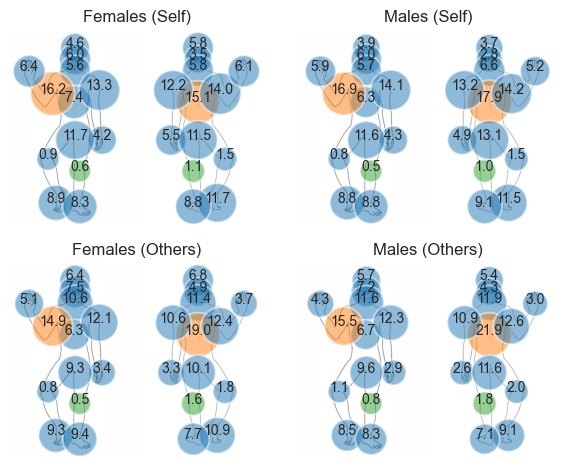

In [202]:
a = plot_sex(self_sex, other_sex, segments, segments_names, map_img)

#TODO:Change size box for bottom on back (and maybe on front)